5. Oscilador de Duffing


$$
 \text{Cuantitativo:} \quad \ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = \gamma \cos (\omega t)\\
$$

$$
 \text{Cualitativo:} \quad  a_x=\frac{dv_x}{dt} \land \quad v_x=\frac{dx}{dt} \land \quad v_1=Mult(\alpha,x) \land \quad \beta=const(\beta_0) \land \quad v_2 = Mult(x,x) \land \quad \\ v_3=Mult(x,v_2) \land \quad v_4 = Mult(\beta,v_3) \land \quad \delta=Const(\delta_0) \land \quad v_5=Mult(\delta,v_x) \land \quad v_6=MultSum(a_x,v_1, v_5, v_4)
  \\   \gamma=Const(\gamma_0) \land \quad v_7=Period(t) \land \quad v_6=Mult(\gamma,v_7)
$$

$$
 \text{Cualitativo2:} \quad x''+f(x') + g(x) + Mult(Mult(x,x),x) = 0 \iff x''+ Mult(Mult(x,x),x) = h(x') + i(x), \quad \text{where} f,g \in M^+_0 \quad h,i \in M^-_0
$$

In [1]:
#import QSIM #imports all submodules
from QSIM import * #imports all functions and classes

# Definir PSR 

In [2]:
#vars x, vx, ax, xsquared, xcubed, v1=h(vx), v2=i(x), sum = ax+xcubed = v1 + v2
#beta=1, gamma=0

#basic landmarks
zero=landmark_value("0",0)
inf=landmark_value("inf",1,is_finite=False)
neg_inf=landmark_value("-inf",-1,is_finite=False)


#time
t0=landmark_value("t0",0)
t_qs=quantity_space("t",[t0,inf])

qv_t0=qualitative_value(t0,Sign(1))
qv_t0_none_sign=qualitative_value(t0,Sign(None))

#add dt as a variable
one=landmark_value("1",Sign(1))
dt_qs=quantity_space(variable="dt",landmarks_list=[zero,one])
dt_qs.set_maximum_limit(one)
dt_qs.set_minimum_limit(zero)

#x
x0=landmark_value("x0",1)
x_qs=quantity_space("x",[neg_inf,zero,x0,inf])



#vx
#vx0=landmark_value("vx0",1)
vx_qs=quantity_space("vx",[neg_inf,zero,inf])

#ax
#ax0=landmark_value("ax0",-1)
ax_qs=quantity_space("ax",[neg_inf,zero,inf])


#i(vx) qs
#ivx0=landmark_value("jvx0",-1)
ivx_qs=quantity_space("i(vx)",[neg_inf,zero,inf])

#j(x) qs
jx0=landmark_value("j(x)0",-1)
jx_qs=quantity_space("j(x)",[neg_inf,jx0,zero,inf])

#rhs
v4_qs=quantity_space("v4",[neg_inf,zero,inf])

#x_squared
x_squared0=landmark_value("x^2_0",1)
x_squared_qs=quantity_space("x^2",[zero,x_squared0,inf])
x_squared_qs.set_minimum_limit(zero)

#x_cubed
x_cubed0=landmark_value("x^3_0",1)
x_cubed_qs=quantity_space("x^3",[neg_inf,zero,x_cubed0,inf])

#h_xcubed
hx_cubed0=landmark_value("h(x^3)_0",1)
hx_cubed_qs=quantity_space("h(x^3)",[neg_inf,zero,hx_cubed0,inf])


#Constraints ( x'' + bx^3 = ix + hvx )
dt_x_vx=Derivative(quantity_spaces=[x_qs,vx_qs])
dt_vx_ax=Derivative(quantity_spaces=[vx_qs,ax_qs])

dt_t_dt=Derivative(quantity_spaces=[t_qs,dt_qs])
const_dt_pos=Constant(quantity_spaces=[dt_qs],current_value=one)

minus_vx_ivx=Minus([vx_qs,ivx_qs])
minus_x_jx=Minus([x_qs,jx_qs])

add_ivx_jx_rhs=Add([ivx_qs,jx_qs,v4_qs])

mult_x_x_xsquared=Mult([x_qs,x_qs,x_squared_qs])

mult_x_xsquared_xcubed=Mult([x_qs,x_squared_qs,x_cubed_qs])

plus_xcubed_hxcubed=Plus([x_cubed_qs,hx_cubed_qs])

add_ax_hxcubed_v4=Add([ax_qs,hx_cubed_qs,v4_qs])


#vars,Q, C
all_q_spaces=[t_qs,x_qs,vx_qs,ax_qs,dt_qs,ivx_qs,jx_qs,x_squared_qs,x_cubed_qs,hx_cubed_qs,v4_qs]#vx_squared_qs,KE_qs,PE_qs,E_qs]
V=[qs.variable for qs in all_q_spaces]

Q={}
for qs in all_q_spaces:
    Q[qs.variable]=qs

C=[dt_x_vx,dt_vx_ax,dt_t_dt,const_dt_pos,minus_vx_ivx,minus_x_jx,add_ivx_jx_rhs,mult_x_x_xsquared,mult_x_xsquared_xcubed,plus_xcubed_hxcubed,add_ax_hxcubed_v4]
   #mult_vx_vx_vx_squared,mplus_vxsq_ke,mplus_x_pe,add_ke_pe_E,const_E]

#State Completion (QDE,Dbar)

#add initial corresponding values
mult_x_x_xsquared.evaluate_tuple(x_qv=qualitative_value(zero,0),y_qv=qualitative_value(zero,0),z_qv=qualitative_value(zero,0),add_if_satisfies=True)
mult_x_xsquared_xcubed.evaluate_tuple(x_qv=qualitative_value(zero,0),y_qv=qualitative_value(zero,0),z_qv=qualitative_value(zero,0),add_if_satisfies=True)

# mult_x_x_xsquared.evaluate_tuple(x_qv=qualitative_value(zero,-1),y_qv=qualitative_value(zero,-1),z_qv=qualitative_value(zero,1),add_if_satisfies=True)
# mult_x_x_xsquared.evaluate_tuple(x_qv=qualitative_value(zero,1),y_qv=qualitative_value(zero,1),z_qv=qualitative_value(zero,1),add_if_satisfies=True)

mult_x_x_xsquared, mult_x_xsquared_xcubed

In [3]:
V,Q,C

(['t', 'x', 'vx', 'ax', 'dt', 'v1', 'v2'],
 {'t': t: t0 ... inf,
  'x': x: -inf ... -1 ... 0 ... 1 ... inf,
  'vx': vx: -inf ... 0 ... vx0 ... inf,
  'ax': ax: -inf ... 0 ... inf,
  'dt': dt: 0 ... 1,
  'v1': v1: -inf ... 0 ... 1 ... inf,
  'v2': v2: -inf ... 0 ... inf},
 [⟨ (d/dt x vx)⟩,
  ⟨ (d/dt vx ax)⟩,
  ⟨ (d/dt t dt)⟩,
  ⟨ (const dt)⟩,
  ⟨ (U-_(0, 1) x v1)  (⟨0, std⟩, ⟨1, std⟩), (⟨-1, dec⟩, ⟨0, dec⟩), (⟨-1, inc⟩, ⟨0, inc⟩), (⟨1, std⟩, ⟨0, std⟩), (⟨1, dec⟩, ⟨0, inc⟩), (⟨1, inc⟩, ⟨0, dec⟩), (⟨-1, std⟩, ⟨0, std⟩)⟩,
  ⟨ ( ADD x ax v2)  (⟨0, std⟩, ⟨0, std⟩, ⟨0, std⟩), (⟨0, std⟩, ⟨0, dec⟩, ⟨0, dec⟩), (⟨0, dec⟩, ⟨0, inc⟩, ⟨0, std⟩), (⟨0, inc⟩, ⟨0, std⟩, ⟨0, inc⟩), (⟨0, dec⟩, ⟨0, dec⟩, ⟨0, dec⟩), (⟨0, inc⟩, ⟨0, dec⟩, ⟨0, dec⟩), (⟨0, dec⟩, ⟨0, inc⟩, ⟨0, dec⟩), (⟨0, inc⟩, ⟨0, dec⟩, ⟨0, std⟩), (⟨0, dec⟩, ⟨0, std⟩, ⟨0, dec⟩), (⟨0, std⟩, ⟨0, inc⟩, ⟨0, inc⟩), (⟨0, inc⟩, ⟨0, inc⟩, ⟨0, inc⟩), (⟨0, inc⟩, ⟨0, dec⟩, ⟨0, inc⟩), (⟨0, dec⟩, ⟨0, inc⟩, ⟨0, inc⟩)⟩,
  ⟨ ( MULT v1 vx v2)⟩])

# Resovler PSR 

In [7]:
from anytree import AsciiStyle, ContRoundStyle, ContStyle, DoubleStyle

#initial state
Dbar={'t':qv_t0_none_sign,'x':qualitative_value(x0,None),'vx':qualitative_value(zero,-1),'ax':qualitative_value(None,None),
      'i(vx)':qualitative_value(zero,None),'j(x)':qualitative_value(jx0,None),"x^2":qualitative_value(x_squared0,None),"x^3":qualitative_value(x_cubed0,None),"h(x^3)":qualitative_value(hx_cubed0,None)}
initial_conditions_state=Qualitative_State(Dbar)


qv_none_both=qualitative_value(None,None)
Trans_conditions=[False]
duffing_root=QSIM(V,Q,C,Trans_conditions,initial_conditions_state,time_var="t",cycle_match_criteria="strong",max_breadth=3000,max_depth=10)

for pre, fill, node in RenderTree(duffing_root,style=ContRoundStyle()): 
    if node.name["cycle_loc"]==None:
        print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" ") #make sure that dictionary is printed in the order of V
    else:
        print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" -> "+str(node.name["cycle_loc"]))

0


100%|██████████| 1/1 [00:00<00:00, 107.34it/s]


1


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


2


100%|██████████| 3/3 [00:00<00:00, 76.07it/s]


3


100%|██████████| 3/3 [00:09<00:00,  3.29s/it]


4


100%|██████████| 5/5 [00:00<00:00, 37.22it/s]


5


100%|██████████| 9/9 [00:23<00:00,  2.63s/it]


6


100%|██████████| 15/15 [00:00<00:00, 49.14it/s]


7


100%|██████████| 33/33 [01:27<00:00,  2.64s/it]


8


100%|██████████| 63/63 [00:01<00:00, 37.85it/s]


9


 25%|██▍       | 36/145 [01:26<04:46,  2.63s/it]

# Graficar Soluciones del PSR

In [6]:
import networkx as nx
import hypernetx as hnx

constraint_name_translation_mapping={"Derivative":"Derivada","Constant":"Constante","Add":"Suma","Minus[-]":r"$M^-_0$","Plus[+]":r"$M^+_0$","U[+]":r"$U^+$","U[-]":r"$U^-$"}


def get_constraint_name(c):
    name=str(type(c)).split(".")[1]
    if isinstance(c,M) or isinstance(c,U):
        name+=str(c.type)

    new_name=name.replace("'>","")
    for key in constraint_name_translation_mapping:
        new_name=new_name.replace(key,constraint_name_translation_mapping[key])

    return new_name


def hypergraph_plot_from_C(C):
    data = {i: c.variables for i,c in enumerate(C)}
    labels={i: get_constraint_name(c) for i,c in enumerate(C)}
    H = hnx.Hypergraph(setsystem=data)
    hnx.draw(H,with_edge_counts=True,edge_labels=labels)


class HashableDict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[


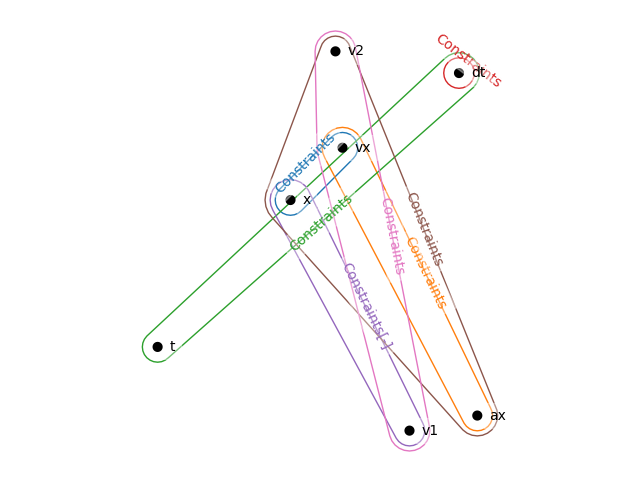

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
data = {i: c.variables for i,c in enumerate(C)}
labels={i: get_constraint_name(c) for i,c in enumerate(C)}
H = hnx.Hypergraph(setsystem=data)

#for n in np.linspace(0.1,0.5,10):
# for n in np.arange(35,50,2):
# for n in random.choices(range(1, 101), k=10):
#     print(n)
#     fig, ax = plt.subplots(figsize=(8, 6)) #800x600
#     hnx.draw(H,with_edge_counts=True,with_color=True,edge_labels=labels,ax=ax,layout_kwargs={'seed': n,'k':1})
#     plt.show()

fig, ax = plt.subplots(figsize=(8, 6)) #800x600
hnx.draw(H,with_edge_counts=True,with_color=True,edge_labels=labels,ax=ax,layout_kwargs={'seed': 91,'iterations':50,'k':2})
#plt.savefig('Document Figures/5PSR_osc_van_der_pol.png',bbox_inches='tight', pad_inches=0)

In [14]:
stationary_behavior=get_behavior_from_leaf(stationary_damped_root.children[0],key=None)[1:]

normal_behaviors=[]
for leaf in damped_root.leaves:
    normal_behaviors.append(get_behavior_from_leaf(leaf,key=None)[1:])

all_behaviors=[stationary_behavior]+normal_behaviors

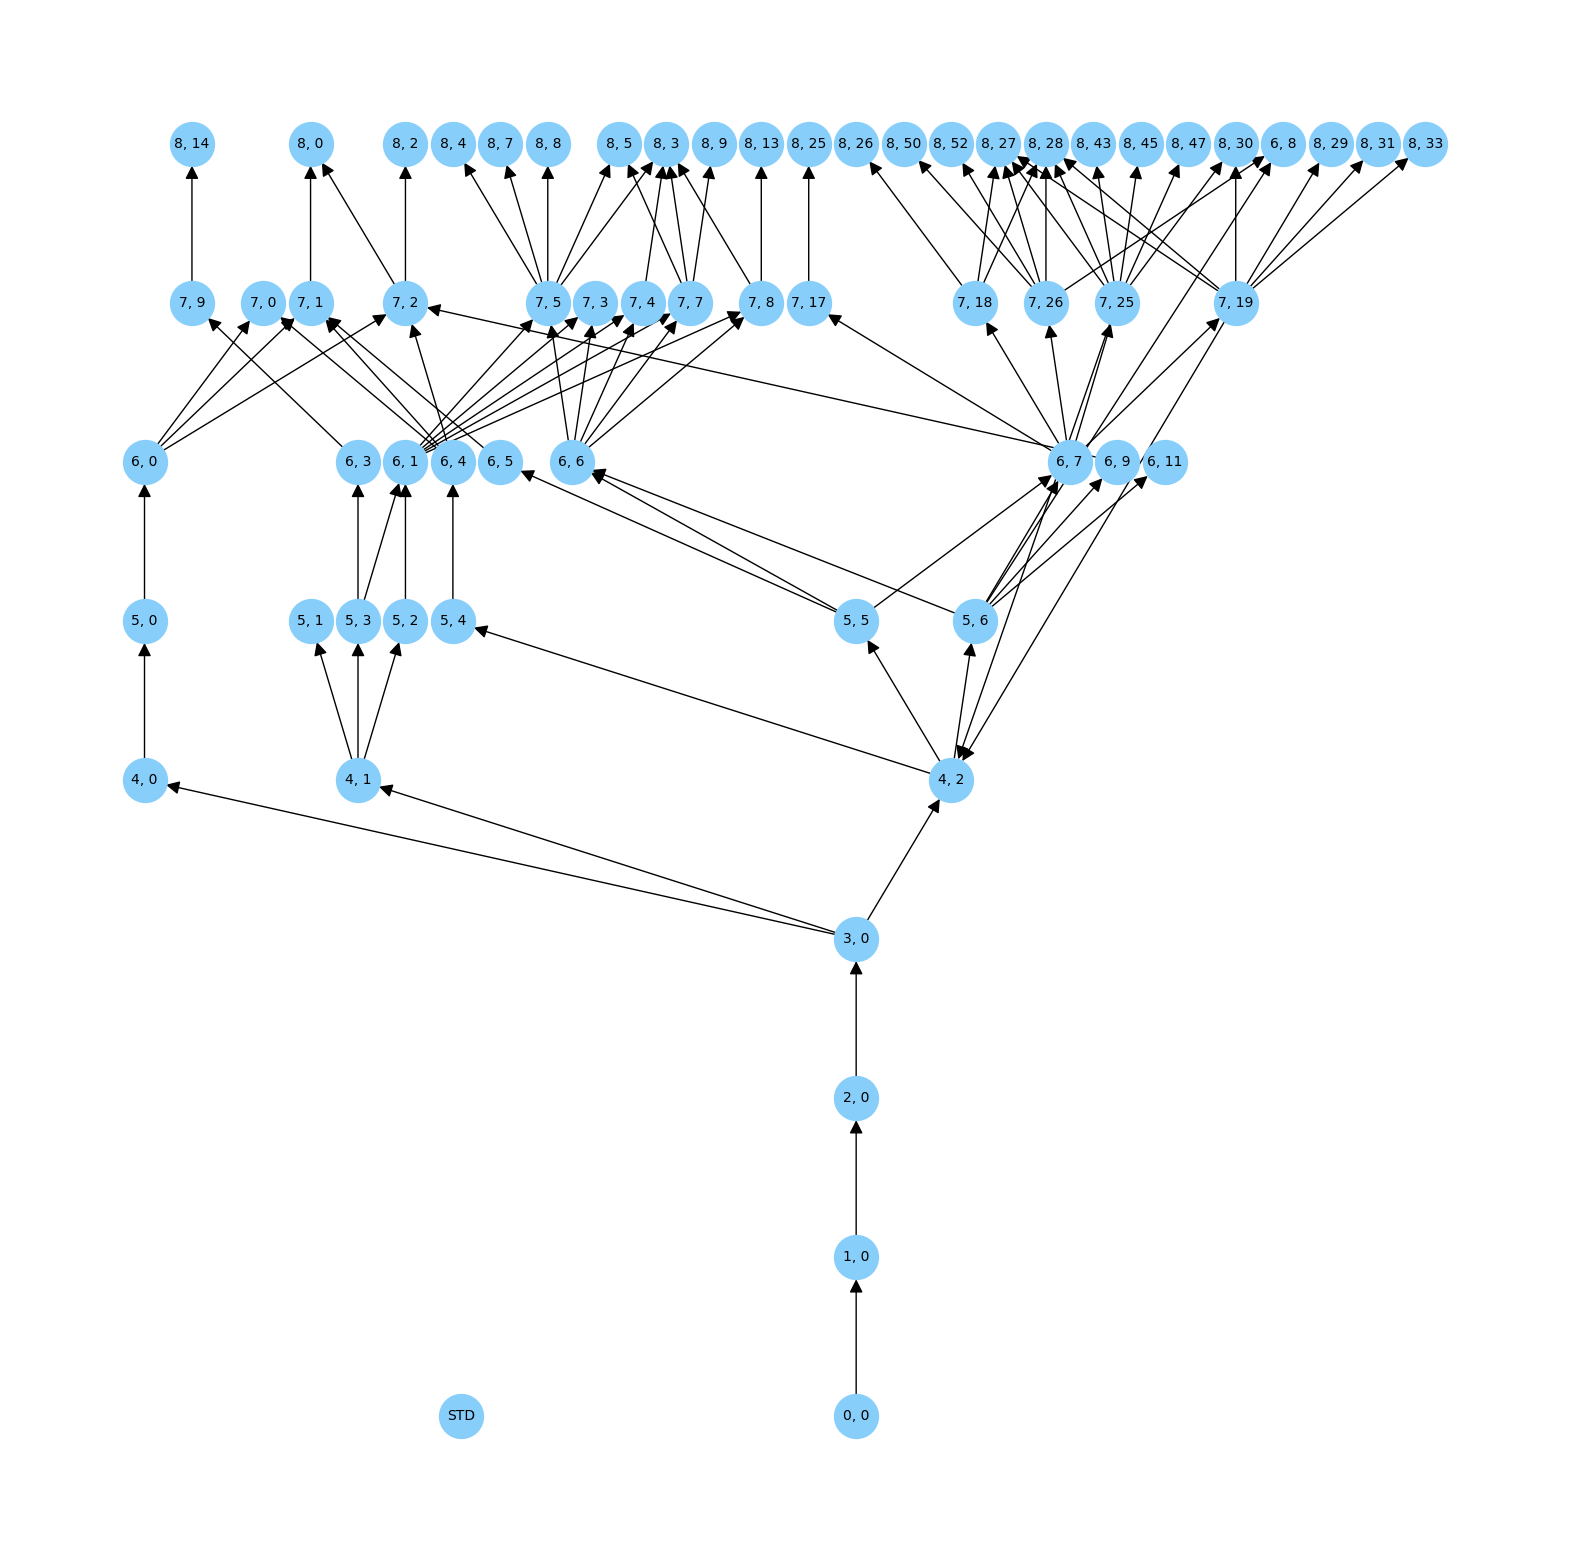

In [16]:
import networkx as nx
import pandas as pd

from grandalf.graphs import Vertex,Edge,Graph,graph_core
from grandalf.layouts import SugiyamaLayout


G = nx.DiGraph()

class HashableDict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

data=[]
behavior_edges=[]
for i,behavior in enumerate(all_behaviors):
    for j,s in enumerate(behavior):
        state=HashableDict({key: s.name["State"].get(key,qv_none_both) for key in V})
        q=s.name["Q"]
        loc=s.name["loc"]
        cycle_loc=s.name["cycle_loc"]
        data.append([i,state,q,loc,cycle_loc])
        
        if j>0:
            behavior_edges.append([data[-2][1],state])

data_df=pd.DataFrame(data,columns=["Behavior_No","State","Q","loc","cycle_loc"])


behavior_nodes=data_df.drop_duplicates(subset=["State"])["State"].to_list()
#add cycle edges
for index, row in data_df.dropna(subset=["cycle_loc"])[["loc","cycle_loc"]].drop_duplicates().iterrows():
    loc1,loc2=row["loc"],row["cycle_loc"]
    state1=data_df[data_df["loc"]==loc1]["State"].iloc[-1]
    state2=data_df[data_df["loc"]==loc2]["State"].iloc[-1]
    behavior_edges.append([state1,state2])

G.add_nodes_from(behavior_nodes)
G.add_edges_from(behavior_edges)

#pos=nx.spectral_layout(G)
#pos=nx.shell_layout(G) #x
#pos=nx.random_layout(G)
#pos=nx.circular_layout(G) #x
#pos=nx.kamada_kawai_layout(G,) #x
#pos=nx.planar_layout(G) #x
#pos=nx.spring_layout(G,pos=pos,iterations=2)

#use grandalf's Sugiyama algorithm to compute positions
V_dict = {node: Vertex(node) for node in G.nodes()}
gr_vertices = list(V_dict.values())
gr_edges = [Edge(V_dict[edge[0]], V_dict[edge[1]]) for edge in G.edges()]
G_grandalf = Graph(gr_vertices, gr_edges)


class defaultview(object):
    w,h = 10,10
for v in gr_vertices: 
    v.view = defaultview()

sug = SugiyamaLayout(G_grandalf.C[1])
sug.init_all()#(roots=[gr_vertices[1]],inverted_edges=[gr_vertices[4].e_to(gr_vertices[0])])
sug.draw()

pos={}
for v in G_grandalf.C[1].sV:
    #print("%s: (%d,%d)"%(v.data,v.view.xy[0],v.view.xy[1]))
    pos[v.data]=np.array([v.view.xy[0],v.view.xy[1]])



labels = {}
for i,node in enumerate(G.nodes()):
    labels[node] = data_df[data_df["State"]==node]["loc"].apply(lambda x: str(x).replace("(","").replace(")","")).iloc[0]

#change info for stationary behavior
stationary_state=HashableDict(stationary_behavior[0].name["State"])
pos[stationary_state]=np.array([-250,5])
labels[stationary_state]="STD"

plt.figure(figsize=(20,20))
ax=plt.subplot()

# # Draw the graph in the first subplot
nx.draw_networkx(G, with_labels=True,arrows=True,pos=pos,node_size=1000,arrowsize=20,node_color="lightskyblue",labels=labels,font_size=10,ax=ax) #labels
plt.box(False)
#plt.savefig('Document Figures/4osc_amortiguado_envisionment.png',bbox_inches='tight', pad_inches=0.075)
plt.show()